# Exploratory analysis (for time-series analysis)

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from datetime import datetime
import numpy as np

import warnings
warnings.simplefilter('ignore')

from utils import get_dataframe

In [2]:
data = get_dataframe(solar_noon_altitudes=True)
# remove whitespace at beginning of column name
data.columns = [col.strip() for col in data.columns]
data.head()

,Datum und Uhrzeit,Gesamtanlage[kWh],FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,Solar noon altitudes
0,01.01.2019,1.71013,15.2,4.8,1.6,8,0.0,0,7.9,7.1,965.6,4.1,87.0,5.2,2.7,1.9,0.328030
1,02.01.2019,0.02722,17.0,6.0,0.6,8,0.7,0,7.0,5.0,965.5,0.4,78.0,3.2,-2.1,-4.8,0.329488
2,03.01.2019,0.49862,10.1,4.1,0.0,8,2.9,0,7.4,3.9,971.2,-1.9,73.0,-0.6,-3.1,-4.4,0.331079
3,04.01.2019,0.00908,12.1,4.2,5.0,8,0.0,0,7.7,4.8,970.3,-1.1,85.0,-0.3,-1.7,-2.2,0.332803
4,05.01.2019,0.00005,16.1,6.5,22.1,8,0.0,5,7.6,5.9,963.8,0.0,96.0,1.0,-0.9,-0.8,0.334658


In [6]:
# drop 29.02.2020 because there is no value in the other years to compare
data = data.drop(data[data["Datum und Uhrzeit"] == "29.02.2020"].index).reset_index()
data = data.drop("index", axis=1)

# add column for year, month and day of the year
# convert "Datum und Uhrzeit" column to date
data["Date"] = [datetime.strptime(data["Datum und Uhrzeit"][i], "%d.%m.%Y") for i in range(len(data))]
data["Year"] = data["Date"].dt.year
data["Day of year"] = data["Date"].dt.dayofyear
data["Month"] = data["Date"].dt.month
data = data.drop("Date", axis=1)

In [7]:
data

,Datum und Uhrzeit,Gesamtanlage[kWh],FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,Solar noon altitudes,Year,Day of year,Month
0,01.01.2019,1.71013,15.2,4.8,1.6,8,0.000,0,7.9,7.1,965.60,4.1,87.00,5.2,2.7,1.9,0.328030,2019,1,1
1,02.01.2019,0.02722,17.0,6.0,0.6,8,0.700,0,7.0,5.0,965.50,0.4,78.00,3.2,-2.1,-4.8,0.329488,2019,2,1
2,03.01.2019,0.49862,10.1,4.1,0.0,8,2.900,0,7.4,3.9,971.20,-1.9,73.00,-0.6,-3.1,-4.4,0.331079,2019,3,1
3,04.01.2019,0.00908,12.1,4.2,5.0,8,0.000,0,7.7,4.8,970.30,-1.1,85.00,-0.3,-1.7,-2.2,0.332803,2019,4,1
4,05.01.2019,0.00005,16.1,6.5,22.1,8,0.000,5,7.6,5.9,963.80,0.0,96.00,1.0,-0.9,-0.8,0.334658,2019,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,27.12.2022,4.30673,13.7,2.7,0.0,0,5.550,0,5.1,6.5,965.60,4.5,76.83,7.0,1.2,-1.2,0.322729,2022,361,12
1456,28.12.2022,4.12369,6.9,2.6,0.0,0,3.600,0,7.4,6.1,959.33,5.1,70.38,9.5,0.6,-1.6,0.323508,2022,362,12
1457,29.12.2022,4.28937,9.5,3.2,1.2,6,3.417,0,7.8,6.0,953.10,8.9,52.33,13.5,5.1,3.0,0.324422,2022,363,12
1458,30.12.2022,3.92056,13.3,2.9,1.5,6,6.100,0,6.1,8.1,955.09,7.4,78.33,12.7,4.3,2.0,0.325471,2022,364,12


## Energy production

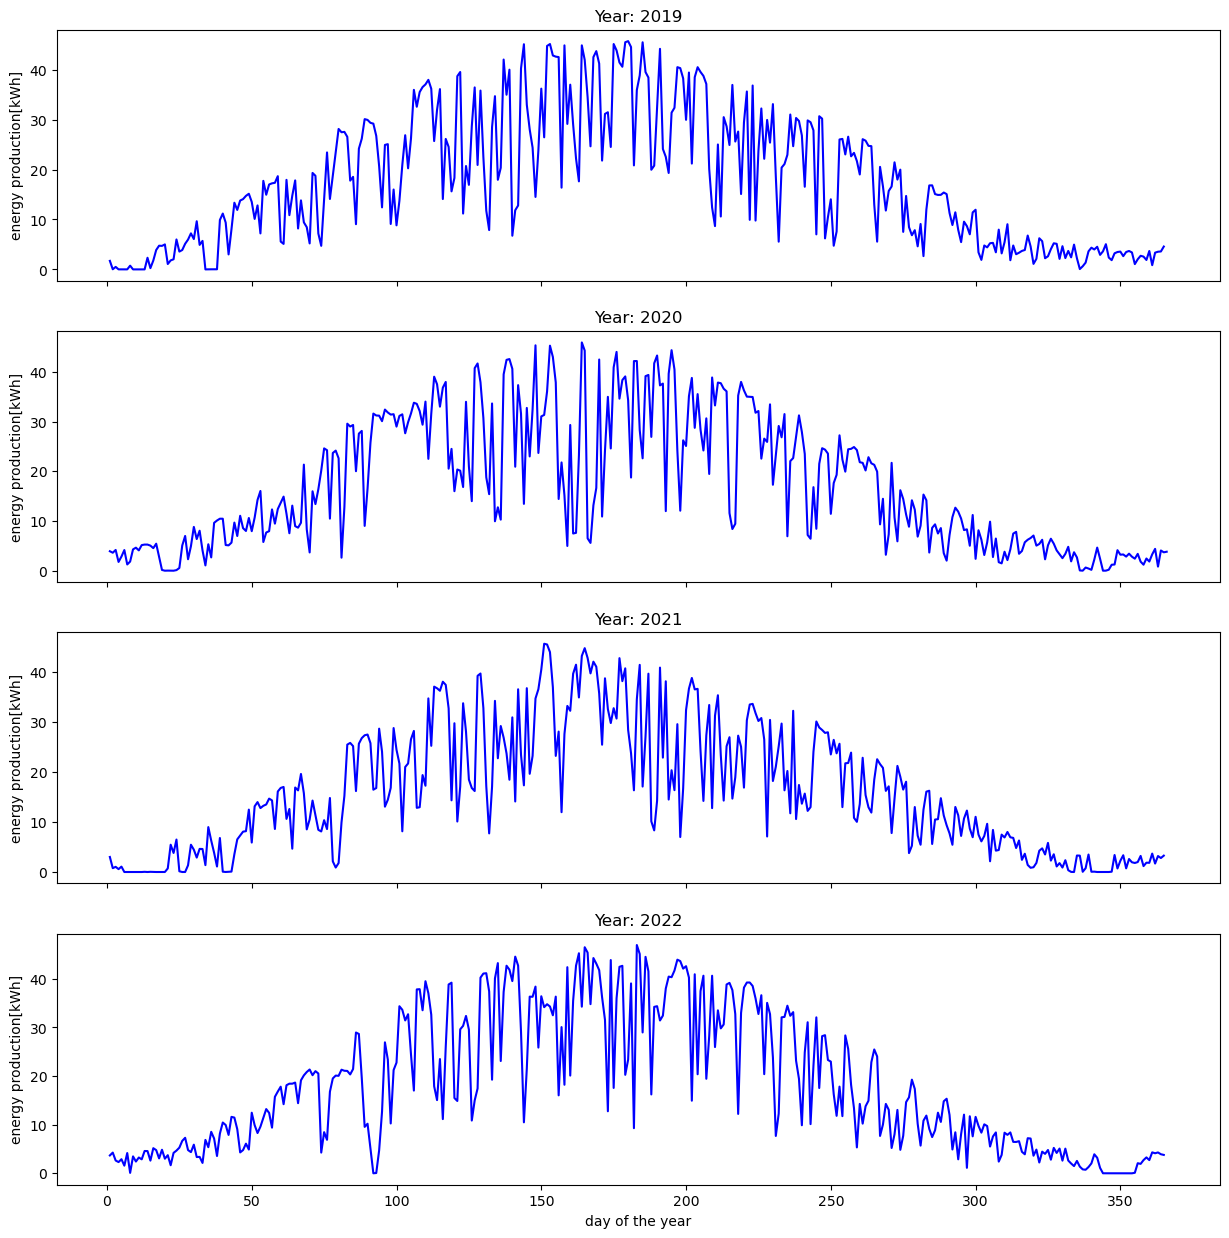

In [53]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    year_data = data[data["Year"] == year]

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1
    
axes[3].set_xlabel("day of the year")
plt.show()

## Energy production and sunshine for every day of the year

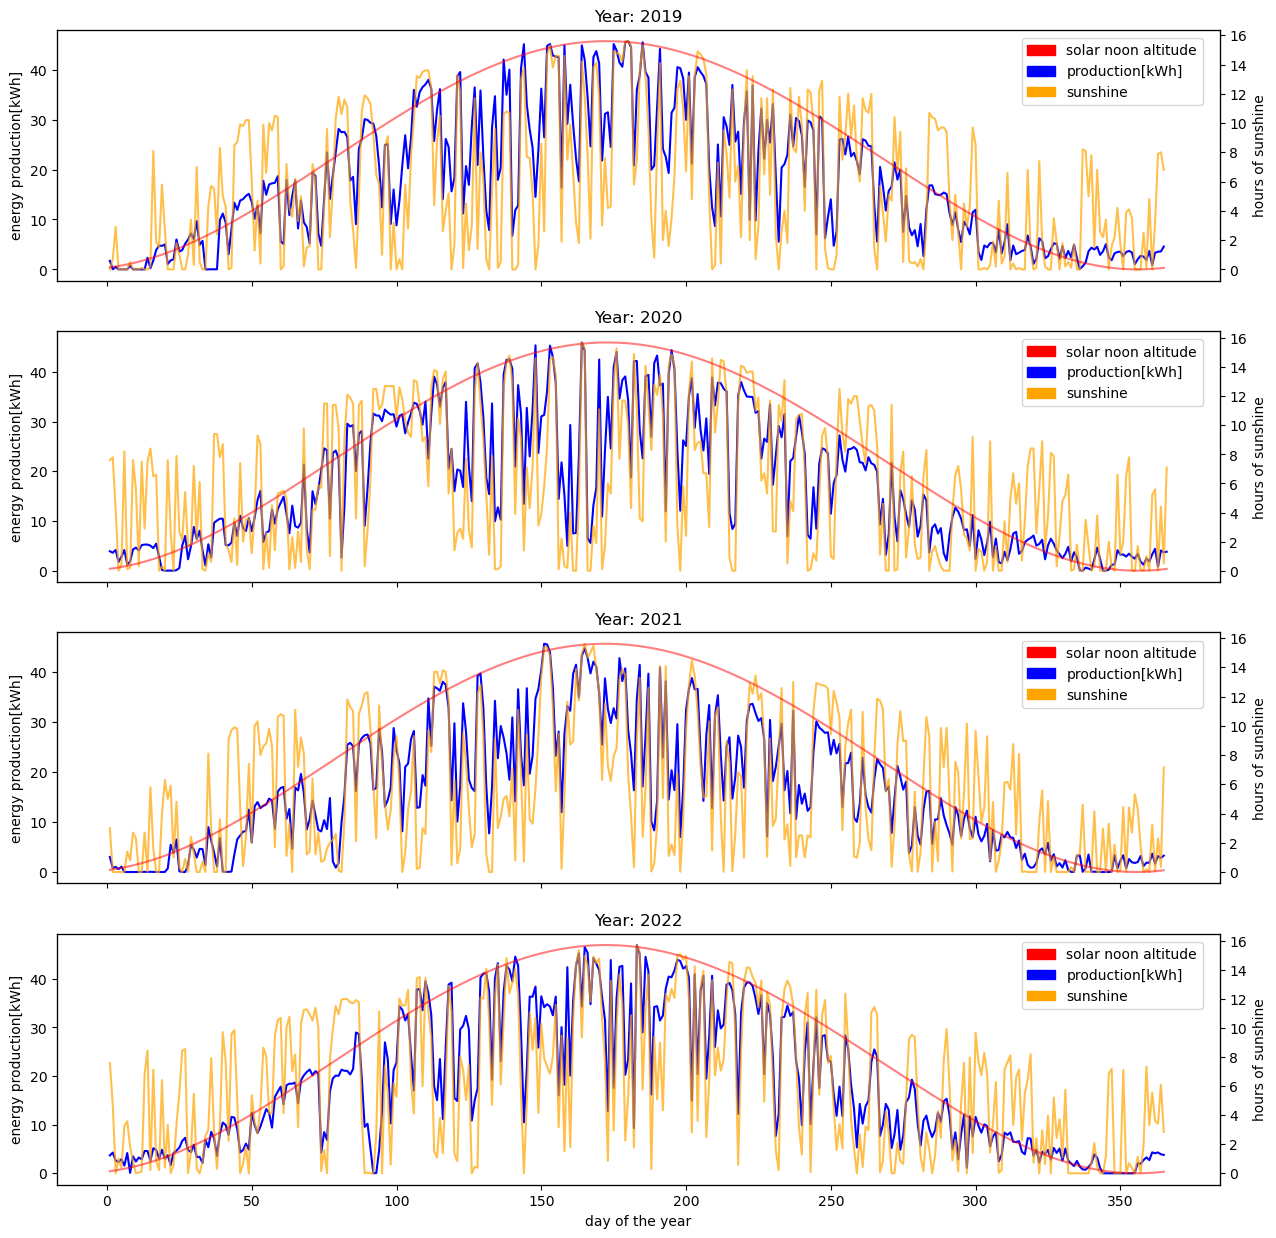

In [35]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    # use different y axis
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    year_data = data[data["Year"] == year]

    # plot hours of sunshine
    ax2.plot(
        year_data["Day of year"],
        year_data["SDK"],
        color="orange",
        alpha=0.7
    )
    ax2.set_ylabel("hours of sunshine")
    
    # plot solar noon altitudes
    ax3.plot(
        year_data["Day of year"],
        year_data["Solar noon altitudes"],
        color="red",
        alpha=0.5
    )
    ax3.set_yticks([])

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1

    # legend
    colors = {'solar noon altitude': 'red', 'production[kWh]': 'blue', 'sunshine': 'orange'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.83,0.7))
    
axes[3].set_xlabel("day of the year")
plt.show()

## Energy production and relative humidity

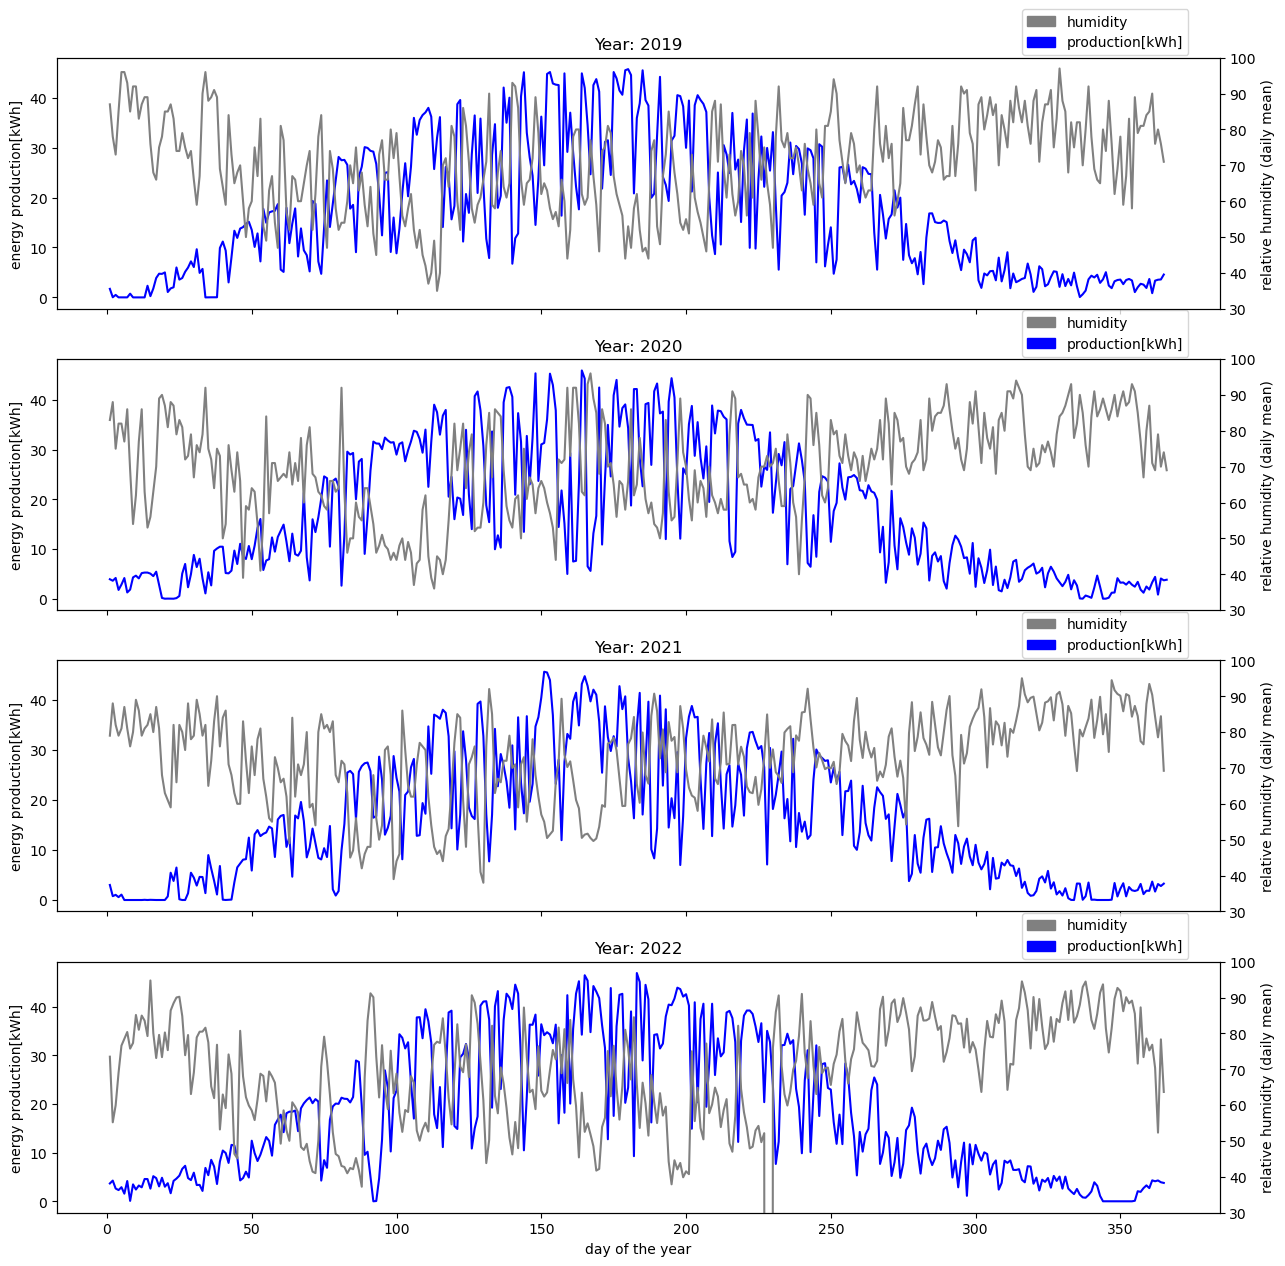

In [44]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    # use different y axis
    ax2 = ax.twinx()
    year_data = data[data["Year"] == year]

    # plot humidity
    ax2.plot(
        year_data["Day of year"],
        year_data["UPM"],
        color="gray",
        #alpha=0.5
    )
    ax2.set_ylabel("relative humidity (daily mean)")
    ax2.set_ylim(30,100)

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1

    # legend
    colors = {'humidity': 'gray', 'production[kWh]': 'blue'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.83,1.01))
    
axes[3].set_xlabel("day of the year")
plt.show()

Two days have value -999.0 for humidity -> probably missing values

In [137]:
data[data["UPM"] < 30]

,Datum und Uhrzeit,Gesamtanlage[kWh],FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,Solar noon altitudes
1323,16.08.2022,35.04415,6.1,1.9,0.0,0,12.500,0,1.5,-999.0,950.96,22.8,-999.0,30.0,17.0,14.0,0.970549
1324,17.08.2022,32.73360,12.6,1.8,1.9,6,11.583,0,4.9,-999.0,950.65,24.1,-999.0,31.9,16.1,13.0,0.965016


## Energy production and average temperature

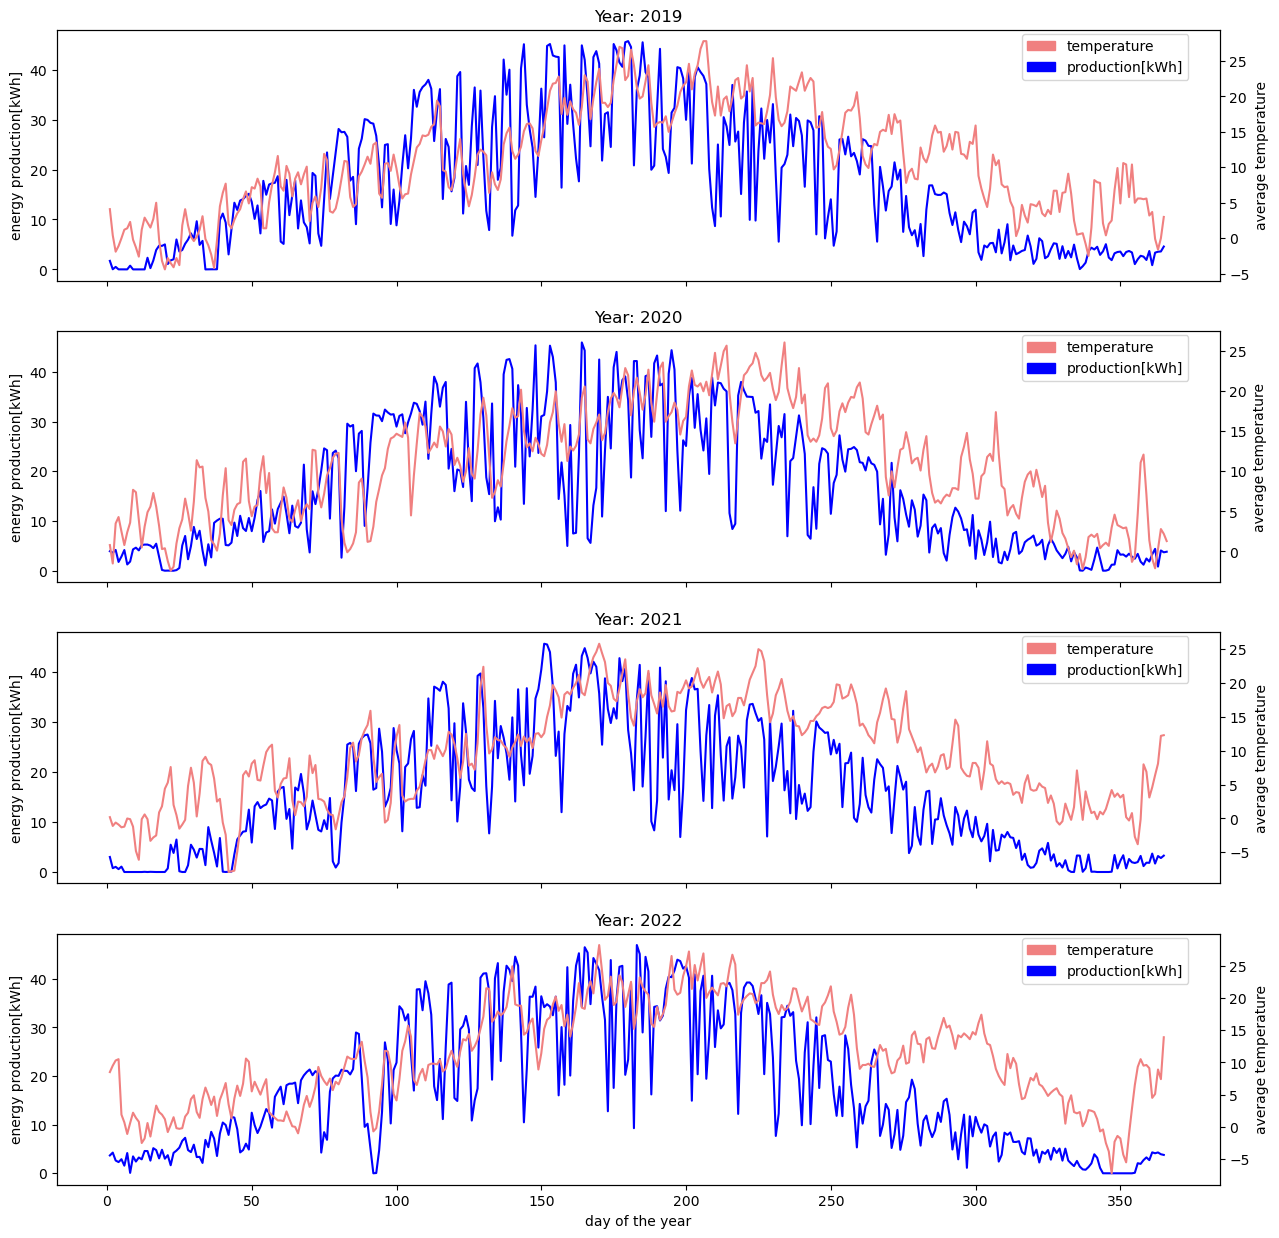

In [52]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    # use different y axis
    ax2 = ax.twinx()
    year_data = data[data["Year"] == year]

    # plot temperature
    ax2.plot(
        year_data["Day of year"],
        year_data["TMK"],
        color="lightcoral",
        #alpha=0.5
    )
    ax2.set_ylabel("average temperature")

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1

    # legend
    colors = {'temperature': 'lightcoral', 'production[kWh]': 'blue'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.83,0.8))
    
axes[3].set_xlabel("day of the year")
plt.show()

## Energy production and rainfall

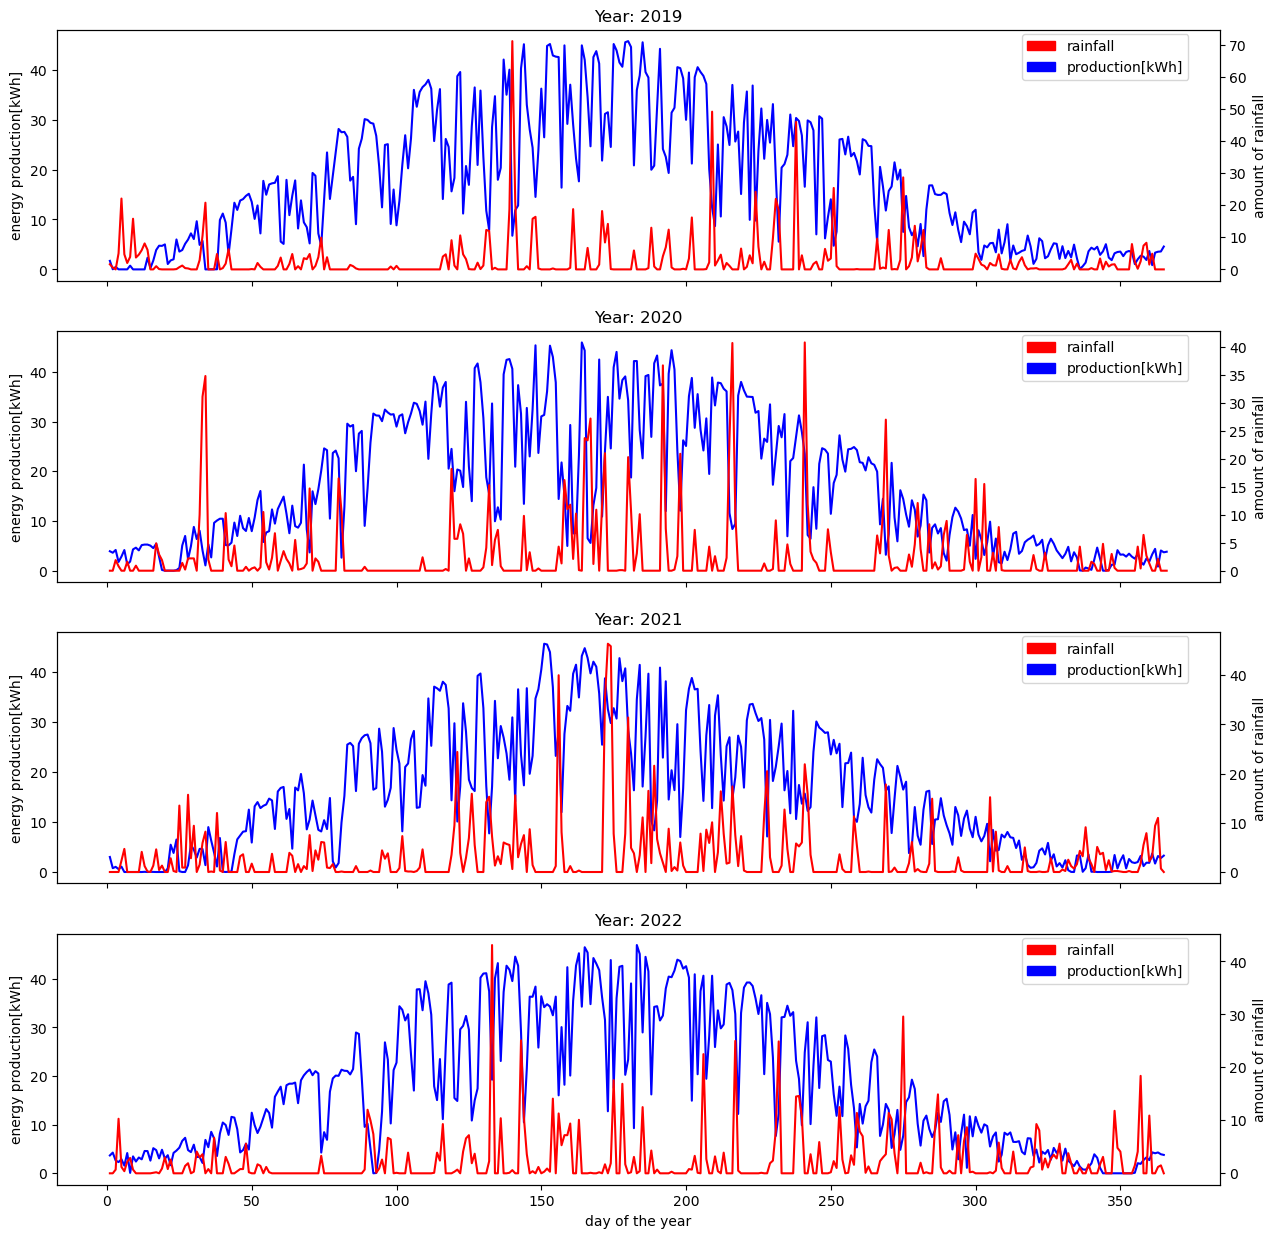

In [57]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    # use different y axis
    ax2 = ax.twinx()
    year_data = data[data["Year"] == year]

    # plot temperature
    ax2.plot(
        year_data["Day of year"],
        year_data["RSK"],
        color="red",
        #alpha=0.5
    )
    ax2.set_ylabel("amount of rainfall")

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1

    # legend
    colors = {'rainfall': 'red', 'production[kWh]': 'blue'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.83,0.8))
    
axes[3].set_xlabel("day of the year")
plt.show()

## Look closer at year 2022

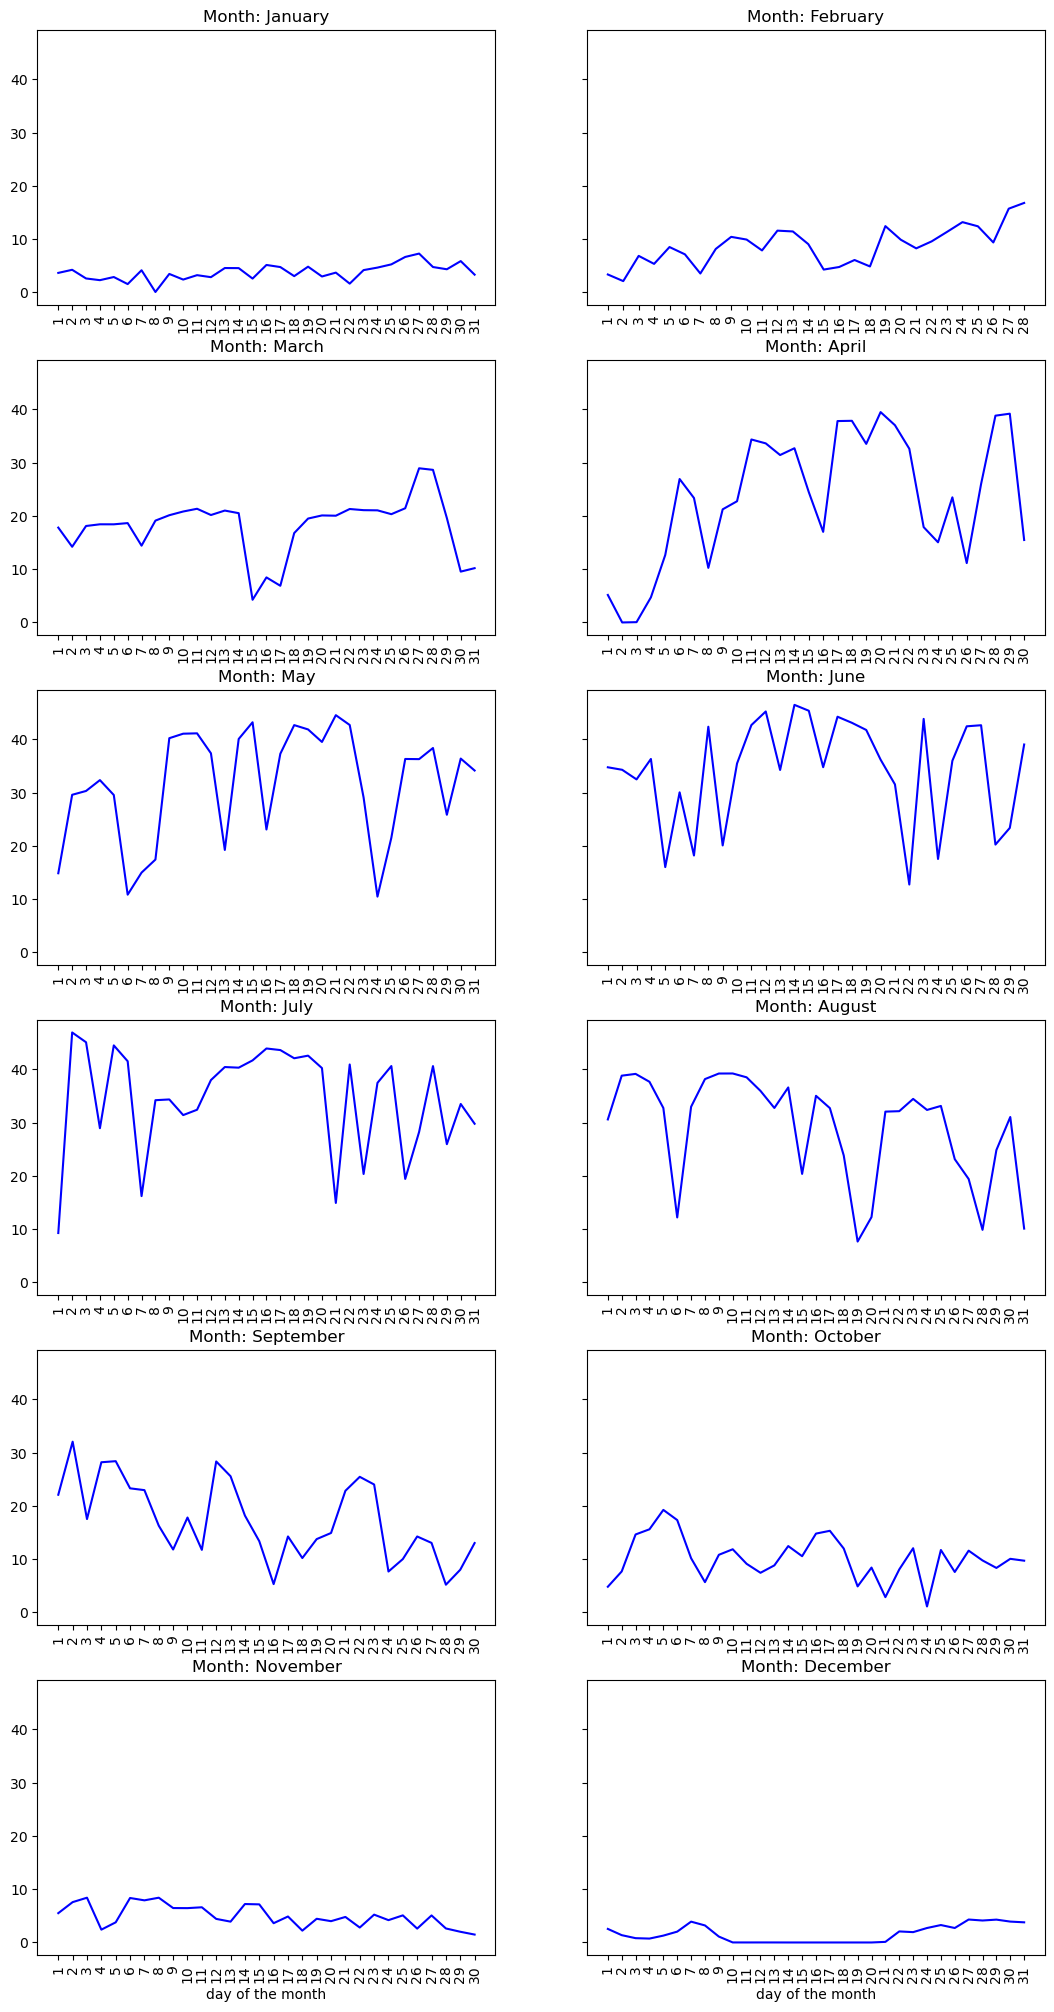

In [108]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data_2022 = data[data["Year"] == 2022]
fig, axes = plt.subplots(6, 2, figsize=(13,25), sharey=True)
i = 0
for month in data["Month"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Month: " + months[month-1])
    month_data = data_2022[data_2022["Month"] == month]

    # plot energy production
    ax.plot(
        month_data["Datum und Uhrzeit"],
        month_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_xticklabels(np.arange(len(month_data))+1, rotation=90)
    #ax.set_ylabel("energy production[kWh]")
    i += 1
    
axes[5,0].set_xlabel("day of the month")
axes[5,1].set_xlabel("day of the month")
plt.show()

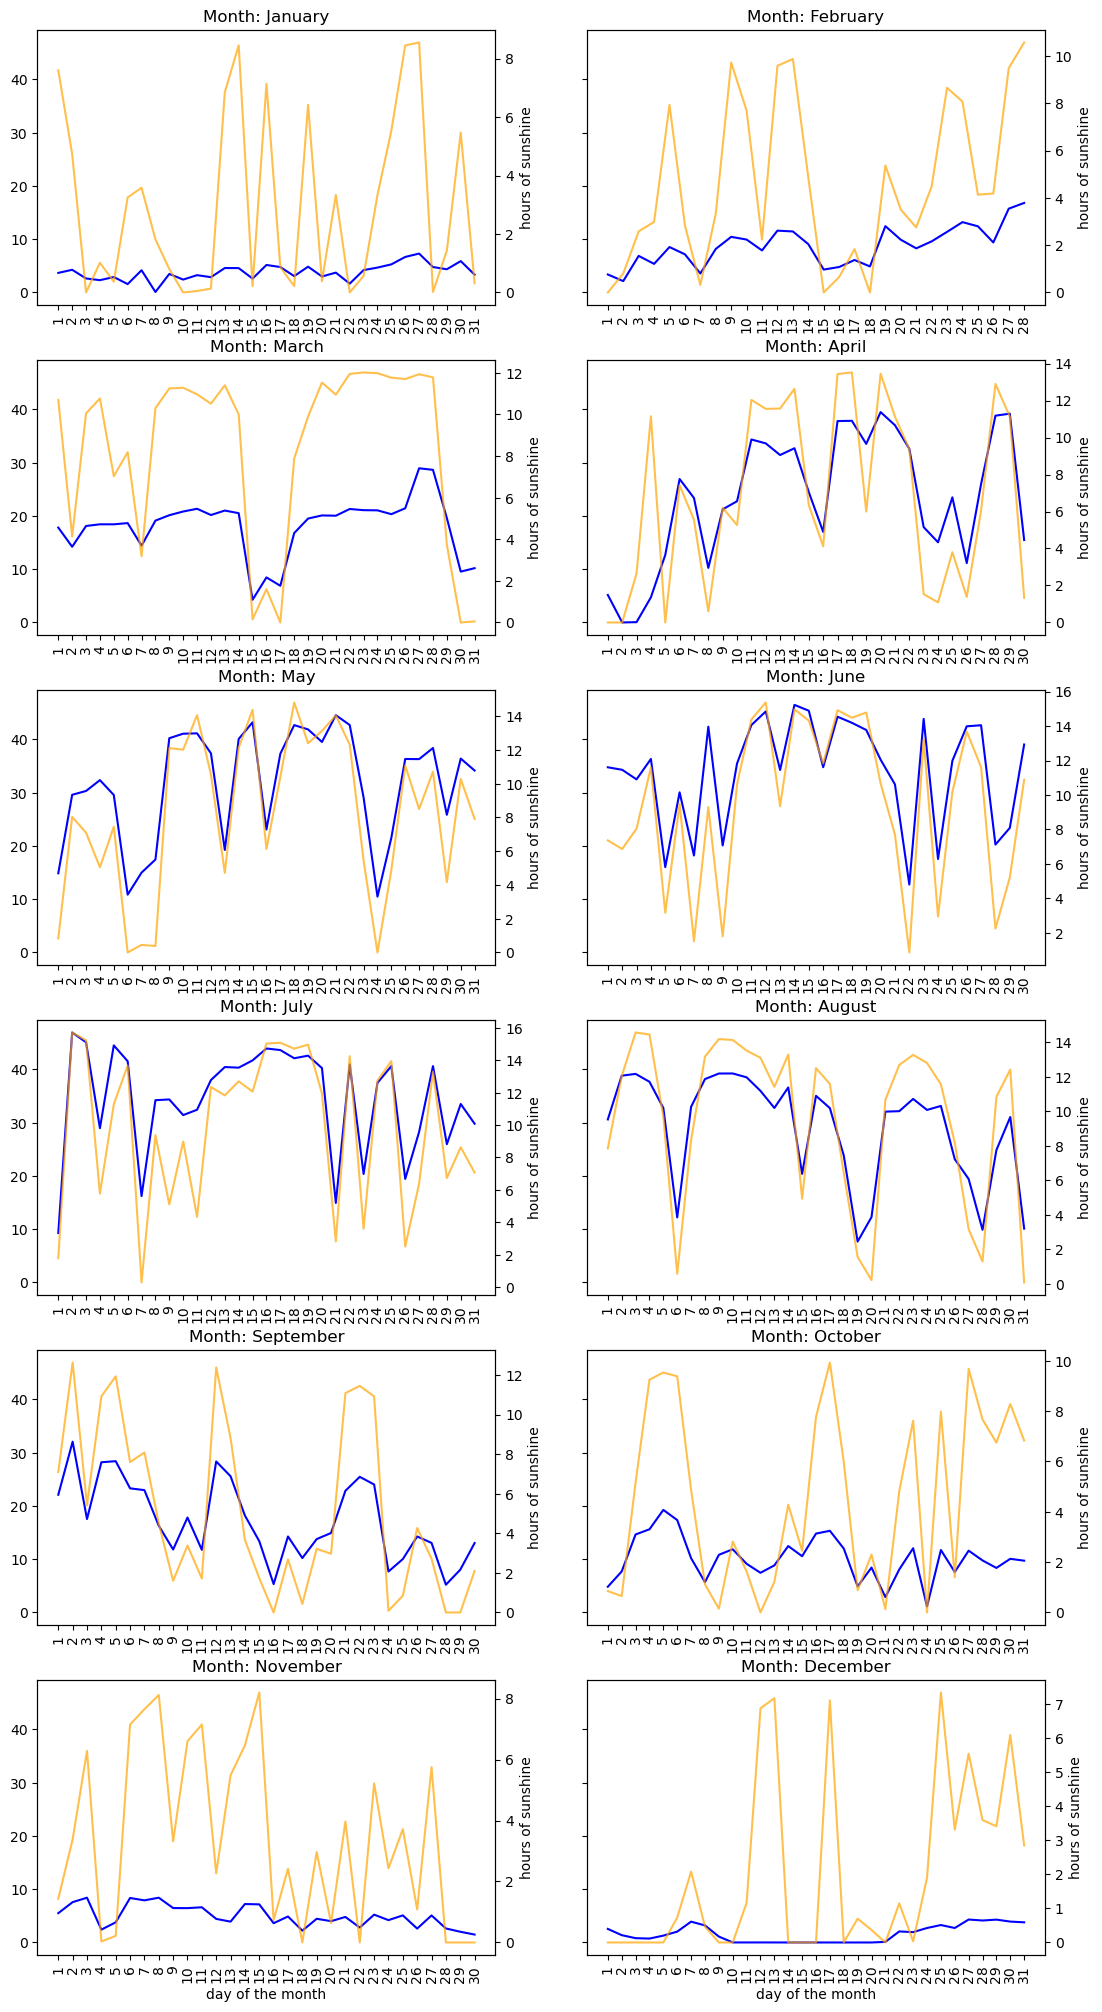

In [107]:
fig, axes = plt.subplots(6, 2, figsize=(13,25), sharey=True)
i = 0
for month in data["Month"].unique():
    ax = axes.flatten()[i]
    ax2 = ax.twinx()
    ax.set_title("Month: " + months[month-1])
    month_data = data_2022[data_2022["Month"] == month]

    # plot hours of sunshine
    ax2.plot(
        month_data["Datum und Uhrzeit"],
        month_data["SDK"],
        color="orange",
        alpha=0.7
    )
    ax2.set_ylabel("hours of sunshine")


    # plot energy production
    ax.plot(
        month_data["Datum und Uhrzeit"],
        month_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_xticklabels(np.arange(len(month_data))+1, rotation=90)
    #ax.set_ylabel("energy production[kWh]")
    i += 1
    
axes[5,0].set_xlabel("day of the month")
axes[5,1].set_xlabel("day of the month")
plt.show()

## Production per hour

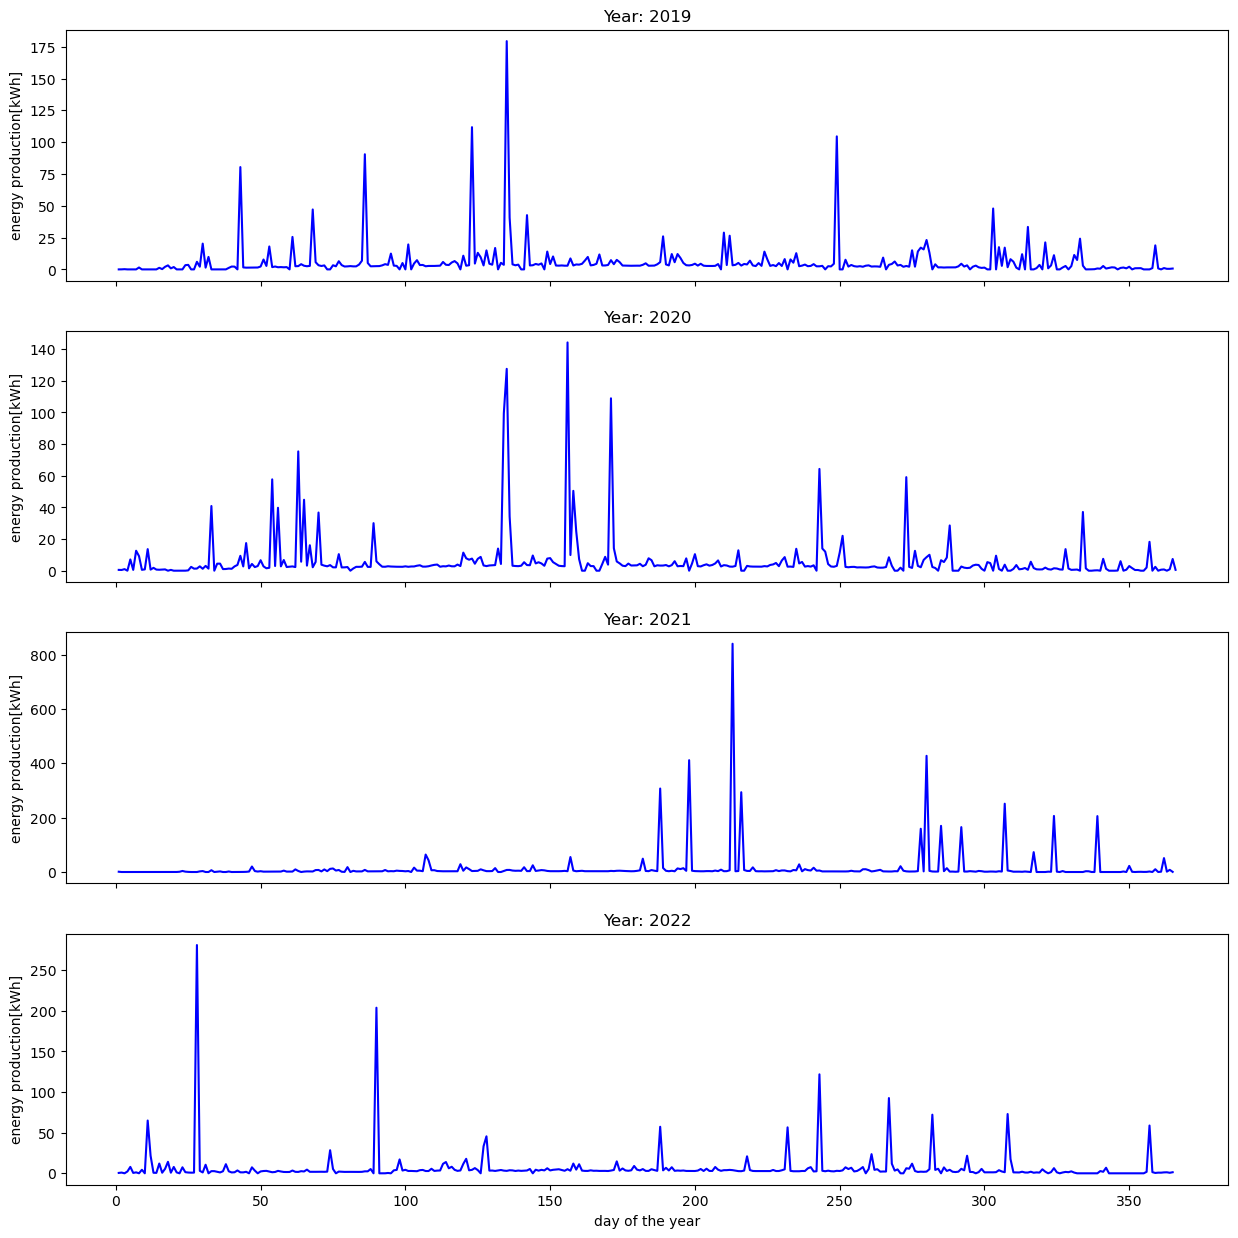

In [101]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    year_data = data[data["Year"] == year]

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        # production per hour -> zero if zero hours of sunshine
        np.divide(year_data["Gesamtanlage[kWh]"], year_data["SDK"], out=np.zeros_like(year_data["Gesamtanlage[kWh]"]), where=year_data["SDK"]!=0),
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1
    
axes[3].set_xlabel("day of the year")
plt.show()

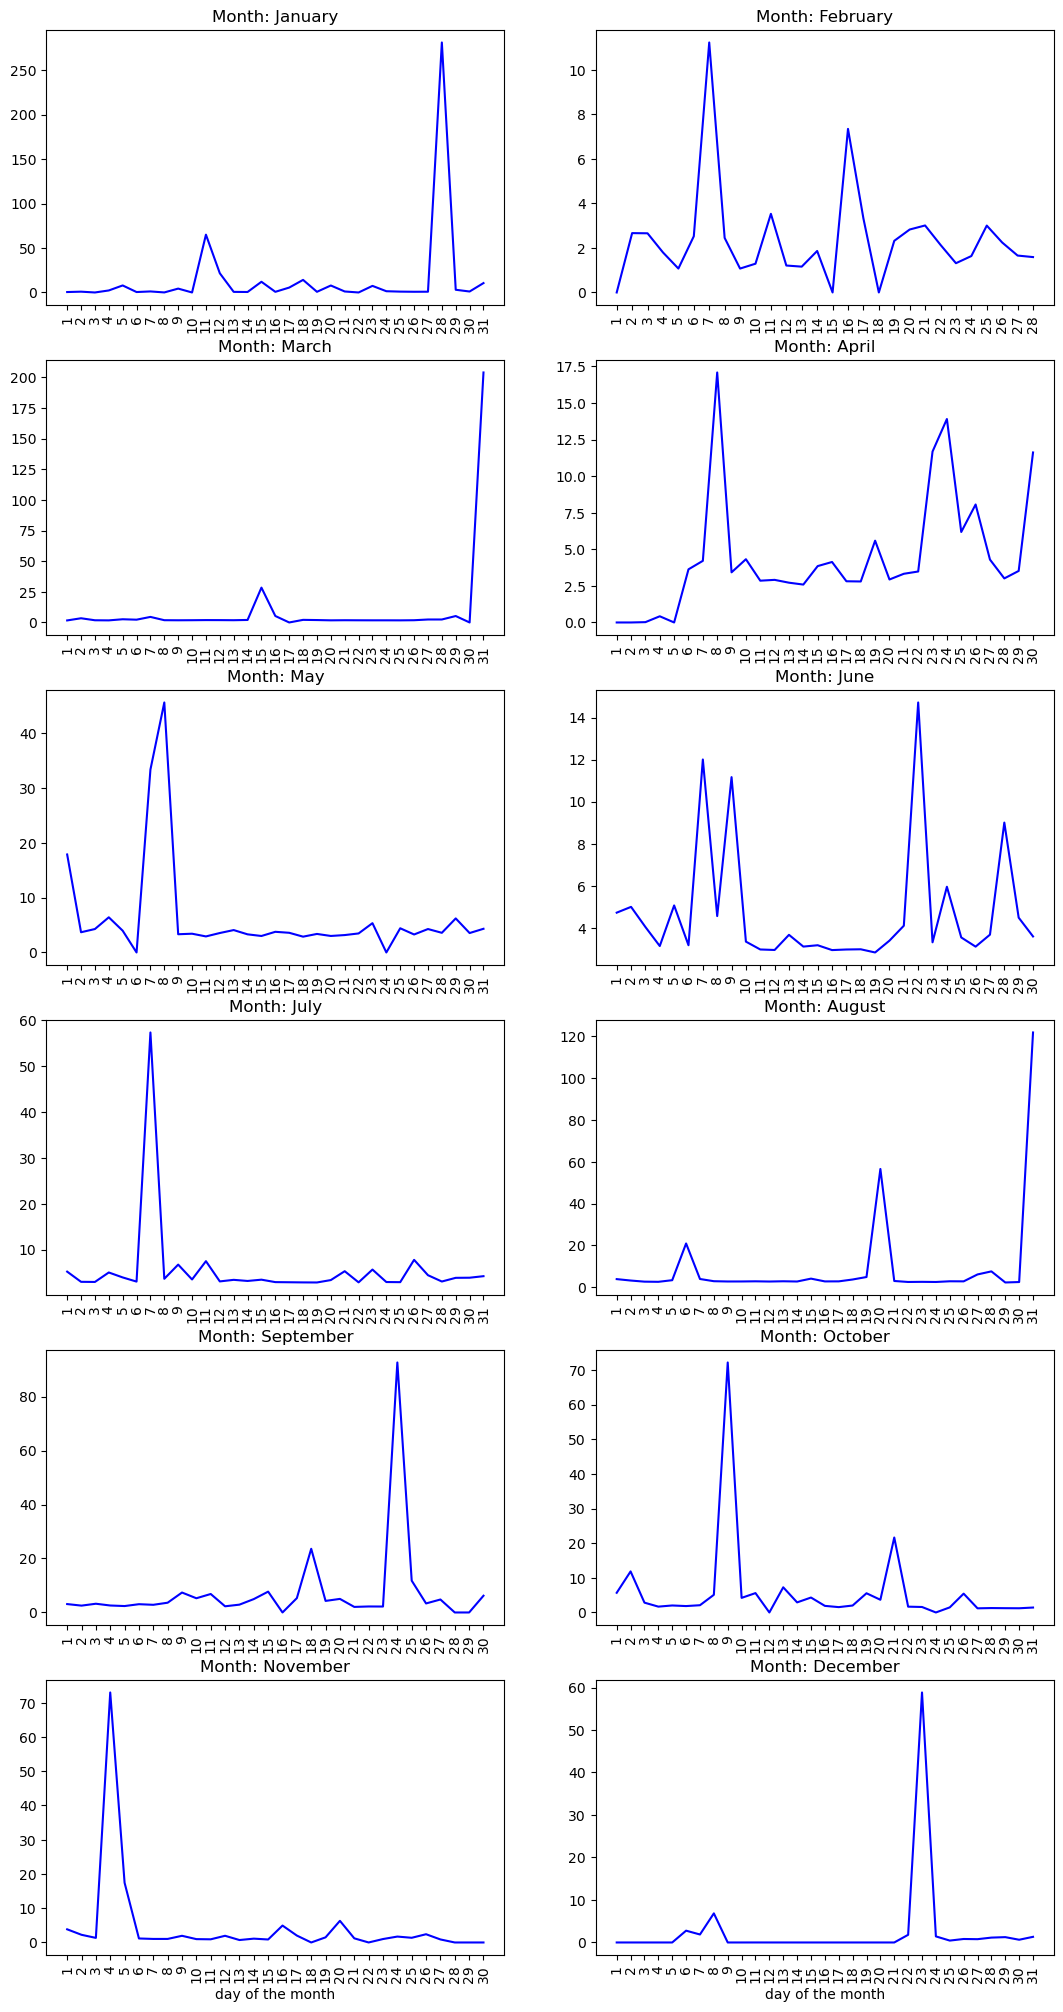

In [106]:
# year 2022
fig, axes = plt.subplots(6, 2, figsize=(13,25), sharey=False)
i = 0
for month in data["Month"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Month: " + months[month-1])
    month_data = data_2022[data_2022["Month"] == month]

    # plot energy production per sunhour
    ax.plot(
        month_data["Datum und Uhrzeit"],
        np.divide(month_data["Gesamtanlage[kWh]"], month_data["SDK"], out=np.zeros_like(month_data["Gesamtanlage[kWh]"]), where=month_data["SDK"]!=0),
        color="blue"
    )
    ax.set_xticklabels(np.arange(len(month_data))+1, rotation=90)
    #ax.set_ylabel("energy production[kWh]")
    i += 1
    
axes[5,0].set_xlabel("day of the month")
axes[5,1].set_xlabel("day of the month")
plt.show()